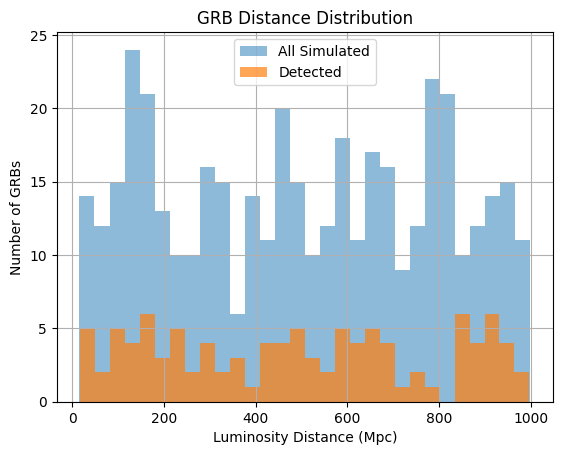

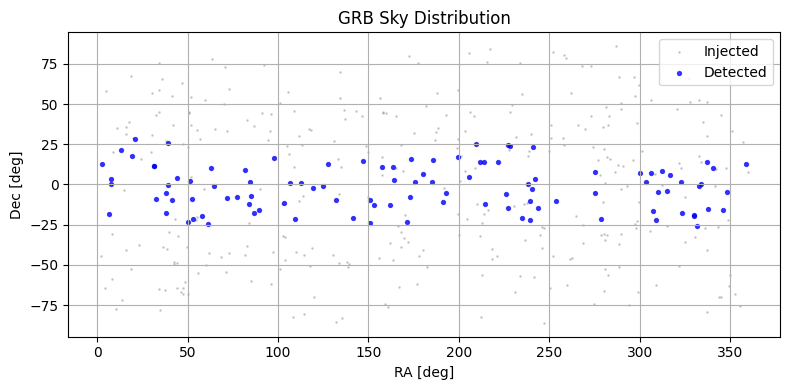

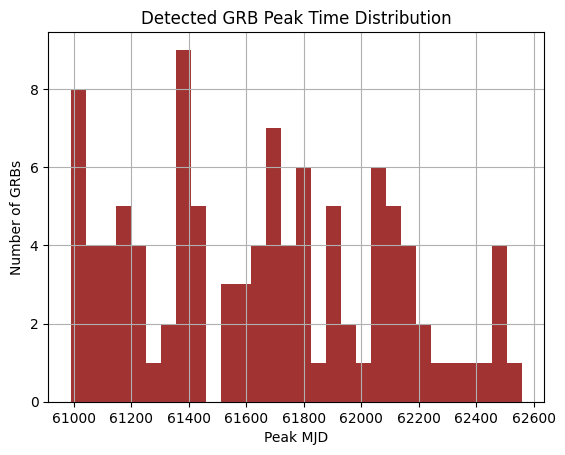

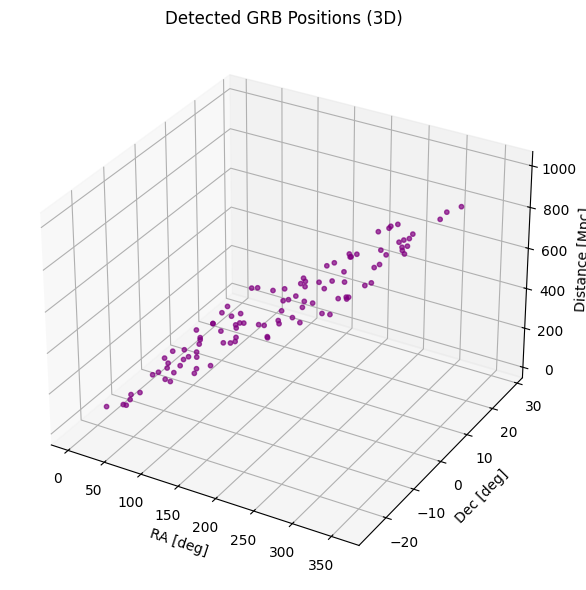

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load all data
with open("GRB_population.pkl", "rb") as f:
    population = pickle.load(f)

with open("GRBAfterglow_templates.pkl", "rb") as f:
    templates = pickle.load(f)["lightcurves"]

with open("AllTransient_MetricDetection/GRB_Afterglows/GRB_ObsDataLC_baseline_v4.3.1_10yrs.pkl", "rb") as f:
    detected = pickle.load(f)

# -------------------------------------------------------
# 1. Histogram of distances for all vs. detected GRBs
# -------------------------------------------------------
plt.hist(population["distance"], bins=30, alpha=0.5, label="All Simulated")
plt.hist([d["distance_Mpc"] for d in detected], bins=30, alpha=0.7, label="Detected")
plt.xlabel("Luminosity Distance (Mpc)")
plt.ylabel("Number of GRBs")
plt.title("GRB Distance Distribution")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------
# 2. Sky map (RA vs Dec) of injected vs. detected
# -------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.scatter(population["ra"], np.degrees(population["dec"]), s=1, alpha=0.3, label="Injected", color="gray")
plt.scatter([d["ra"] for d in detected], np.degrees([d["dec"] for d in detected]),
            s=8, alpha=0.7, label="Detected", color="blue")
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.title("GRB Sky Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 3. Peak MJD distribution of detected events
# -------------------------------------------------------
plt.hist([d["peak_mjd"] for d in detected], bins=30, color="darkred", alpha=0.8)
plt.xlabel("Peak MJD")
plt.ylabel("Number of GRBs")
plt.title("Detected GRB Peak Time Distribution")
plt.grid(True)
plt.show()

# -------------------------------------------------------
# 4. Optional: 3D plot of RA vs Dec vs Distance
# -------------------------------------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([d["ra"] for d in detected],
           np.degrees([d["dec"] for d in detected]),
           [d["distance_Mpc"] for d in detected],
           alpha=0.7, color="purple", s=10)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")
ax.set_zlabel("Distance [Mpc]")
ax.set_title("Detected GRB Positions (3D)")
plt.tight_layout()
plt.show()
